<a href="https://colab.research.google.com/github/PTson2207/CreditCard-FraudModel/blob/main/Credit_Card_Fraud_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Mô hình gian lận thẻ tín dụng được xây dựng dựa vào bộ data được lấy từ Kaggle.
    Hợp Pháp: 0
    Gian Lận: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Financial Modelling/Credit Card Fraud Model(Mô hình tài chính định lượng)/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


    --> các biến trên không cho biết được nhiều thông tin về bộ data

Text(0, 0.5, 'Số lượng')

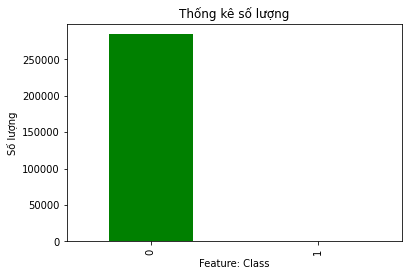

In [4]:
count_classes = pd.value_counts(df['Class'], sort=True).sort_index()
count_classes.plot(kind='bar', color='green')
plt.title('Thống kê số lượng')
plt.xlabel('Feature: Class')
plt.ylabel('Số lượng')

    Dữ liệu mất cân bằng và số lượng giao dịch hợp pháp vượt xa số lượng giao dịch cân bằng.
    Cần phân tích cẩn thận tuyệt đối do độ chính xác điểm chuẩn cao khi chỉ chọn mục tiêu thường xuyên xuát hiện.


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


    chuẩn hóa các biến, sắp xếp lại chúng từ v1->v28->amount->time->class

In [6]:
from sklearn.preprocessing import StandardScaler

time = df['Time']
classes = df['Class']
df.pop('Time')
df.pop('Class')
listed = list(df)
data = StandardScaler().fit_transform(df)

In [7]:
listed

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [8]:
df = pd.DataFrame(data)
df.columns = listed
df['Time'] = time
df['Class'] = classes

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0.0,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0.0,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,1.0,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,1.0,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,2.0,0


In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,1.622758e-15,2.052953e-15,-8.310622e-17,-8.845502e-16,-1.789241e-15,-1.542079e-16,8.046919e-16,-2.547965e-16,-4.550555e-16,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16,94813.859575,0.001727
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,47488.145955,0.041527
min,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01,0.000000,0.000000
25%,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01,54201.500000,0.000000
50%,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01,84692.000000,0.000000
75%,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02,139320.500000,0.000000
max,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02,172792.000000,1.000000


    Tính độ lệch của dữ liệu để biết có nhiều trọng số hay không
    Skew lại dữ liệu.

In [11]:
data = df
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [12]:
# số lượng dữ liệu trong lớp thiểu số
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# chọn các chỉ số của các lớp bình thường
normal_indices = data[data.Class == 0].index

# lấy ngẫu nhiên từ các chỉ số ở trên
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# thêm 2 chỉ số
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# bộ dữ liệu mới dựa trên nguyên mẫu
under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [13]:
print("")
print("Phần trăm giao dịch bình thường:", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Phần trăm giao dịch không bình thường:", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Tổng số dữ liệu trong giao dịch được lấy mẫu lại:", len(under_sample_data))


Phần trăm giao dịch bình thường: 0.5
Phần trăm giao dịch không bình thường: 0.5
Tổng số dữ liệu trong giao dịch được lấy mẫu lại: 984


    Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

# toàn bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Tổng giao dịch ở tập train:", len(X_train))
print("Tổng giao dịch ở tập test:", len(X_test))
print("Tổng số giao dịch:", len(X_train)+len(X_test))

# bộ dữ liệu mẫu
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    X_undersample,
    y_undersample,
    test_size = 0.3
)

print("")
print("Tổng giao dịch ở tập train mới:",len(X_train_undersample))
print("Tổng giao dịch ở tập test cũ:", len(y_train_undersample))
print("Tổng số giao dịch:", len(X_train_undersample)+len(y_train_undersample))

Tổng giao dịch ở tập train: 199364
Tổng giao dịch ở tập test: 85443
Tổng số giao dịch: 284807

Tổng giao dịch ở tập train mới: 688
Tổng giao dịch ở tập test cũ: 688
Tổng số giao dịch: 1376


    * Phương thức đánh giá mô hình: Recall
    Vì sao lại chọn Recall ?
        - Phương thức recall(thu hồi) dễ dàng nắm bắt các giao dịch gian lận nhất.
        - Dự đoán là một giao dịch bình thường, nhưng trên thực tế là một giao dịch gian lận. --> công thức Recall và confusion matrix sẽ chứng minh được. 

    Build Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [16]:
def printing_Kfold_scores(x_train_data, y_train_data):

    fold = KFold(5, shuffle=False)

    # các thông số C khác nhau
    c_param_range = [0.1, 1, 10, 100, 10000] # tham số tự do

    results_table = pd.DataFrame(index=range(len(c_param_range), 2), columns=['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # xuất 2 thông tin của Kfold
    j = 0 
    for c_param in c_param_range:
        print('-----------------------------')
        print('Tham số C:', c_param)
        print('-----------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)): 
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear')   
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())  
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)  
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample) 
            recall_accs.append(recall_acc)
            print('Vòng lặp ', iteration,': Điểm recall = ', recall_acc)

        # tính giá trị trung bình của các thông số ở trên
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Trung bình điểm recall:', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']

    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Model tốt nhất từ cross-validation với tham số C = ', best_c)
    print('*********************************************************************************')

    return best_c


In [17]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-----------------------------
Tham số C: 0.1
-----------------------------

Vòng lặp  0 : Điểm recall =  0.8656716417910447
Vòng lặp  1 : Điểm recall =  0.8873239436619719
Vòng lặp  2 : Điểm recall =  0.9696969696969697
Vòng lặp  3 : Điểm recall =  0.8933333333333333
Vòng lặp  4 : Điểm recall =  0.890625

Trung bình điểm recall: 0.9013301776966639

-----------------------------
Tham số C: 1
-----------------------------

Vòng lặp  0 : Điểm recall =  0.8805970149253731
Vòng lặp  1 : Điểm recall =  0.8732394366197183
Vòng lặp  2 : Điểm recall =  0.9696969696969697
Vòng lặp  3 : Điểm recall =  0.8933333333333333
Vòng lặp  4 : Điểm recall =  0.875

Trung bình điểm recall: 0.8983733509150789

-----------------------------
Tham số C: 10
-----------------------------

Vòng lặp  0 : Điểm recall =  0.8805970149253731
Vòng lặp  1 : Điểm recall =  0.8873239436619719
Vòng lặp  2 : Điểm recall =  0.9696969696969697
Vòng lặp  3 : Điểm recall =  0.92
Vòng lặp  4 : Điểm recall =  0.875

Trung bình điể

    Confusion Matrix

In [18]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    """
    Đây là hàm dùng để vẽ và in ma trận nhầm lẫn.
    Có thể áp dụng chuẩn hóa bằng cách đặt normalize=True.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print('Chuẩn hóa confusion matrix')
    else:
        1
    #print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j]> thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')

In [19]:
lr = LogisticRegression(C = best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

In [20]:
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

In [21]:
print('Phương thức Recall ở tập testing:', cnf_matrix[1,1]/(cnf_matrix[1, 1] + cnf_matrix[1, 0]))

Phương thức Recall ở tập testing: 0.9328859060402684


    điểm recall ở tập train : 0.9161504209913133
    điểm recall ở tập test : 0.9225352112676056


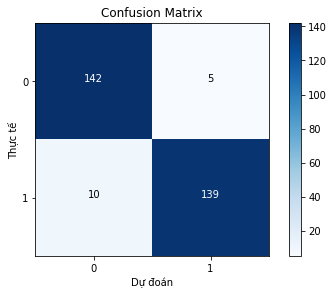

In [22]:
# visualize 
class_name = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_name,
                      title='Confusion Matrix')
plt.show()

    ROC Curve

In [23]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

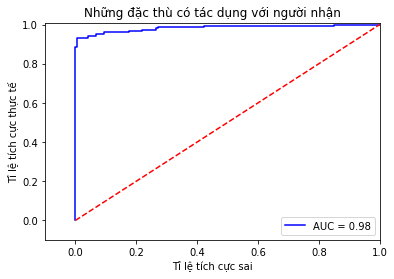

In [24]:
plt.title('Những đặc thù có tác dụng với người nhận')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('Tỉ lệ tích cực thực tế')
plt.xlabel('Tỉ lệ tích cực sai')
plt.show()

    Với tập dữ liệu ban đầu(Thực)

In [25]:
best_c = printing_Kfold_scores(X_train, y_train)

-----------------------------
Tham số C: 0.1
-----------------------------

Vòng lặp  0 : Điểm recall =  0.6176470588235294
Vòng lặp  1 : Điểm recall =  0.6527777777777778
Vòng lặp  2 : Điểm recall =  0.5238095238095238
Vòng lặp  3 : Điểm recall =  0.59375
Vòng lặp  4 : Điểm recall =  0.7222222222222222

Trung bình điểm recall: 0.6220413165266107

-----------------------------
Tham số C: 1
-----------------------------

Vòng lặp  0 : Điểm recall =  0.6470588235294118
Vòng lặp  1 : Điểm recall =  0.6666666666666666
Vòng lặp  2 : Điểm recall =  0.5238095238095238
Vòng lặp  3 : Điểm recall =  0.671875
Vòng lặp  4 : Điểm recall =  0.7083333333333334

Trung bình điểm recall: 0.6435486694677872

-----------------------------
Tham số C: 10
-----------------------------

Vòng lặp  0 : Điểm recall =  0.6470588235294118
Vòng lặp  1 : Điểm recall =  0.6666666666666666
Vòng lặp  2 : Điểm recall =  0.5238095238095238
Vòng lặp  3 : Điểm recall =  0.6875
Vòng lặp  4 : Điểm recall =  0.708333333333333

In [26]:
lr = LogisticRegression(C = best_c, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test.values)

In [28]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [29]:
print('Phương thức Recall ở tập testing:', cnf_matrix[1,1]/(cnf_matrix[1, 1] + cnf_matrix[1, 0]))

Phương thức Recall ở tập testing: 0.5882352941176471


    Đây là dữ liệu thực

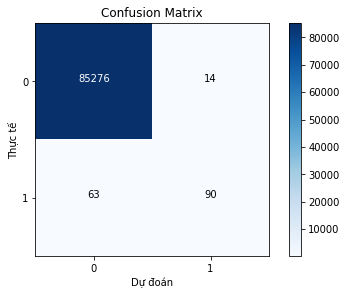

In [30]:
class_name = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_name,
                      title='Confusion Matrix')
plt.show()

    Dùng ngưỡng để phân loại

Điểm Recall trên tập dữ liệu testing: 0.9798657718120806
Điểm Recall trên tập dữ liệu testing: 0.9530201342281879
Điểm Recall trên tập dữ liệu testing: 0.9261744966442953
Điểm Recall trên tập dữ liệu testing: 0.9060402684563759
Điểm Recall trên tập dữ liệu testing: 0.8859060402684564
Điểm Recall trên tập dữ liệu testing: 0.8590604026845637
Điểm Recall trên tập dữ liệu testing: 0.8120805369127517
Điểm Recall trên tập dữ liệu testing: 0.7651006711409396
Điểm Recall trên tập dữ liệu testing: 0.6644295302013423


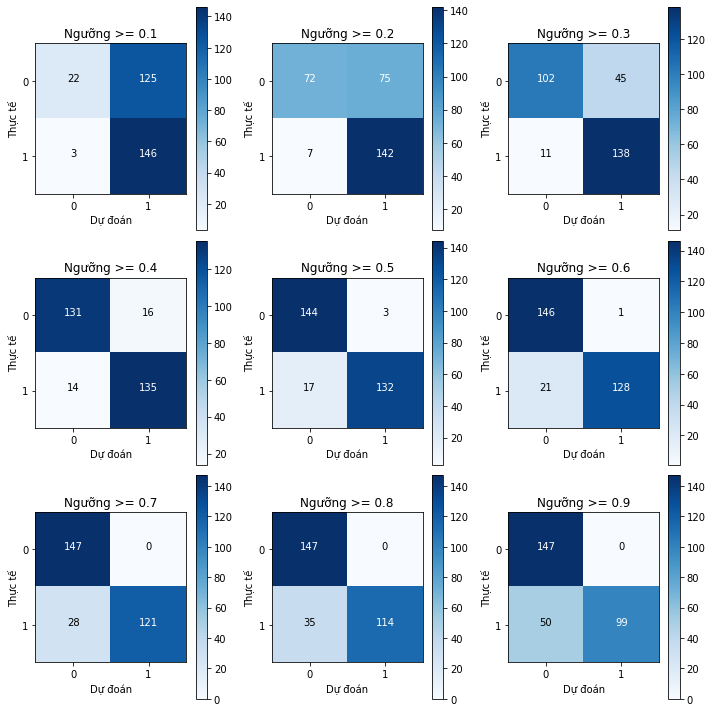

In [31]:
lr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 10))

j = 1 
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print('Điểm Recall trên tập dữ liệu testing:', cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))

    class_name = [0, 1]
    plot_confusion_matrix(cnf_matrix,
                          classes=class_name,
                          title='Ngưỡng >= %s' %i)

    Nhận xét:
        Khi ngưỡng càng lên cao thì điểm Recall càng giảm. Nhưng nhìn vào ô FP thì con số dự đoán
        cũng giảm theo. Hợp lí.

    Dùng Mạng Neural Network để dự đoán kết quả phân loại

In [32]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0.0,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0.0,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,1.0,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,1.0,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,2.0,0


In [33]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Time      0
Class     0
dtype: int64

In [34]:
print('Gian lận')
print(df.Amount[df.Class==1].describe())

Gian lận
count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64


In [35]:
print('Hợp pháp')
print(df.Amount[df.Class==0].describe())

Hợp pháp
count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64


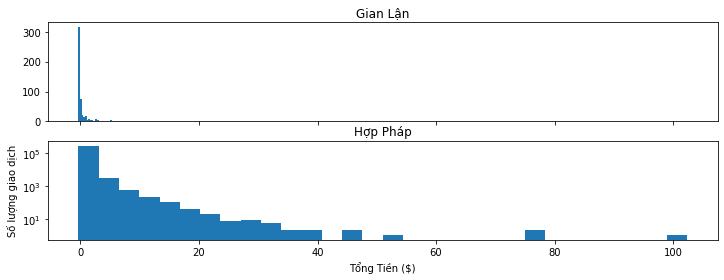

In [37]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Gian Lận')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Hợp Pháp')

plt.xlabel('Tổng Tiền ($)')
plt.ylabel('Số lượng giao dịch')
plt.yscale('log')
plt.show()